## **Visualizacion Basica**

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

En primer lugar se importan los datos del csv y se decide eliminar los datos de 2024 para que los gráficos no se "contaminen", por lo tanto el timeline del dataset sera 2010-2023

In [3]:
# Importar CSV
df_tourism = pd.read_csv('../data/tourism_clean.csv')  # Ajusta la ruta si es necesario
# Eliminamos los datos de 2024 
df_tourism = df_tourism[df_tourism['Year'] != 2024]

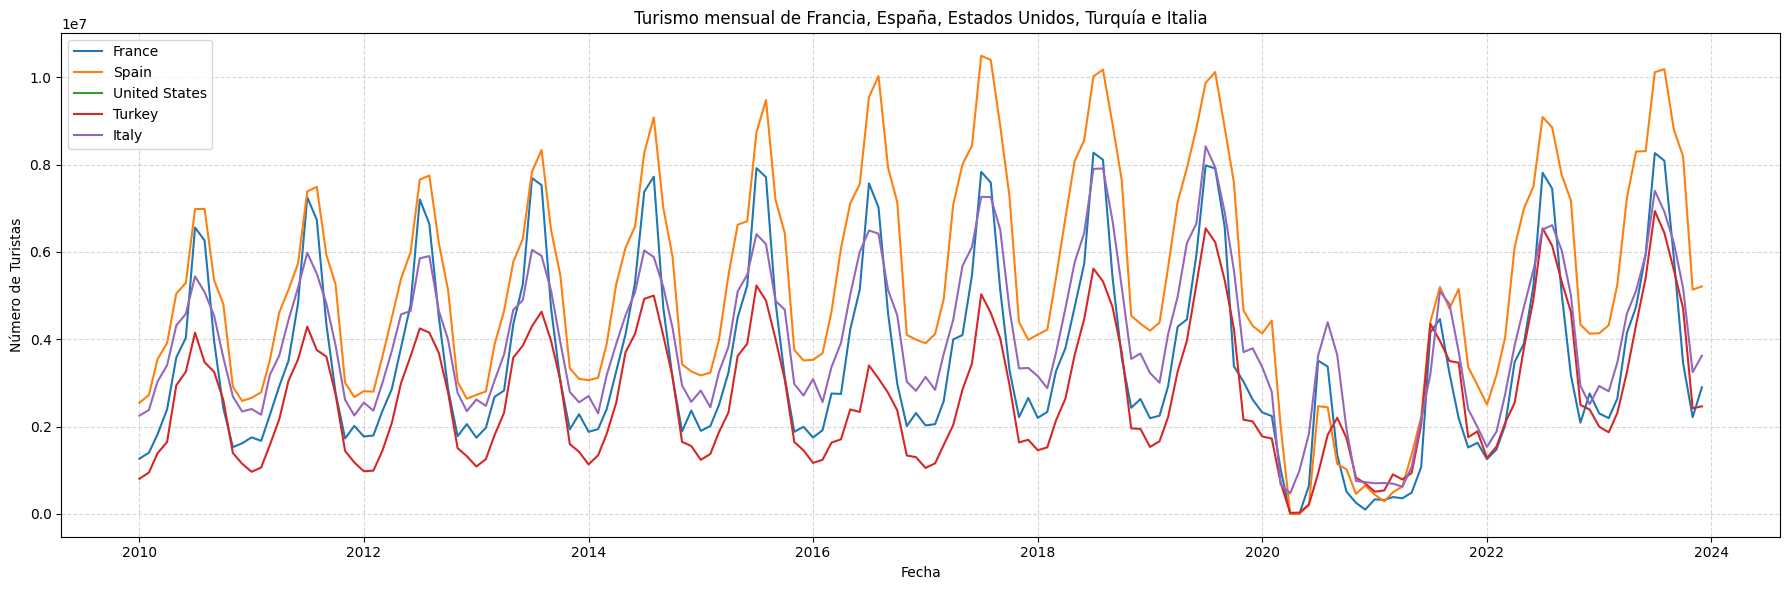

In [5]:
# Convertir Year y Month a una columna datetime para el eje x
df_tourism['Date'] = pd.to_datetime(df_tourism[['Year', 'Month']].assign(DAY=1))

# Lista de países que queremos graficar
selected_countries = ['France', 'Spain', 'United States', 'Turkey', 'Italy'] # top paises con mas turismo

# Filtrar el dataframe para esos países
df_selected = df_tourism[df_tourism['Country'].isin(selected_countries)]

# Graficar con líneas limpias y figura alargada
plt.figure(figsize=(18,6))  # lo hacemos mas anmcho para ver mejor las graficas
for country in selected_countries:
    country_data = df_selected[df_selected['Country'] == country]
    plt.plot(country_data['Date'], country_data['N_visitors'], label=country)  # sin marker

plt.xlabel('Fecha')
plt.ylabel('Número de Turistas')
plt.title('Turismo mensual de Francia, España, Estados Unidos, Turquía e Italia')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

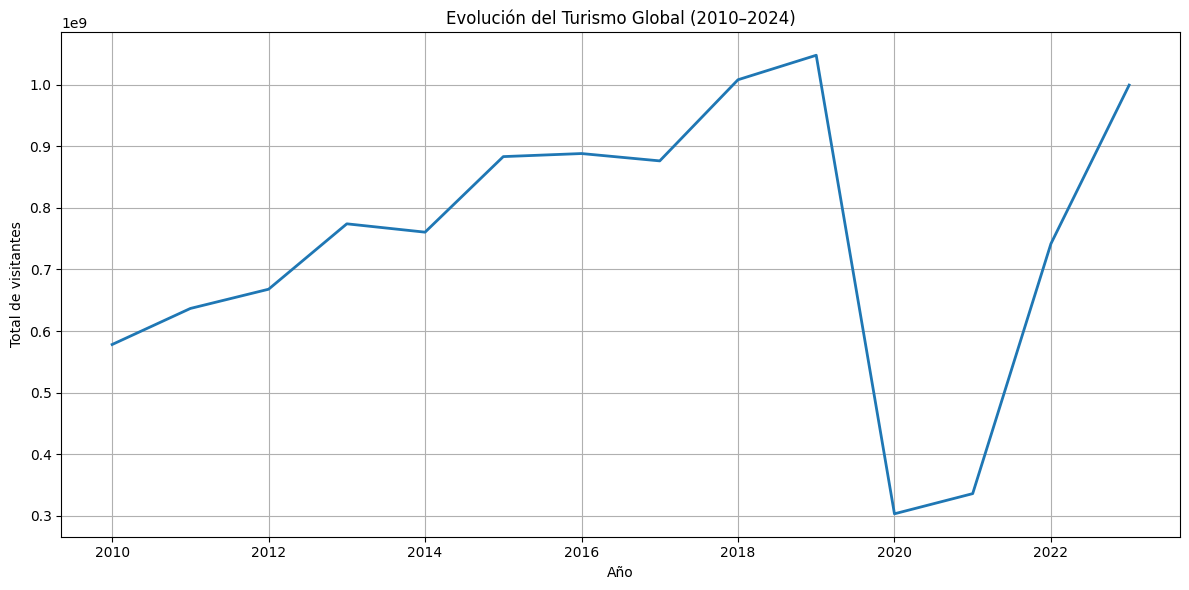

In [8]:

# Agrupar por año
df_global = df_tourism.groupby("Year")["N_visitors"].sum().reset_index()

# Gráfica sin puntos
plt.figure(figsize=(12,6))
plt.plot(df_global["Year"], df_global["N_visitors"], linewidth=2)  # ← sin marker
plt.title("Evolución del Turismo Global (2010–2024)")
plt.xlabel("Año")
plt.ylabel("Total de visitantes")
plt.grid(True)
plt.tight_layout()
plt.show()


Turismo por habitante

C:\Users\David\AppData\Local\Temp\ipykernel_25816\122265164.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["N_visitors"].sum() / x["Population"].max())


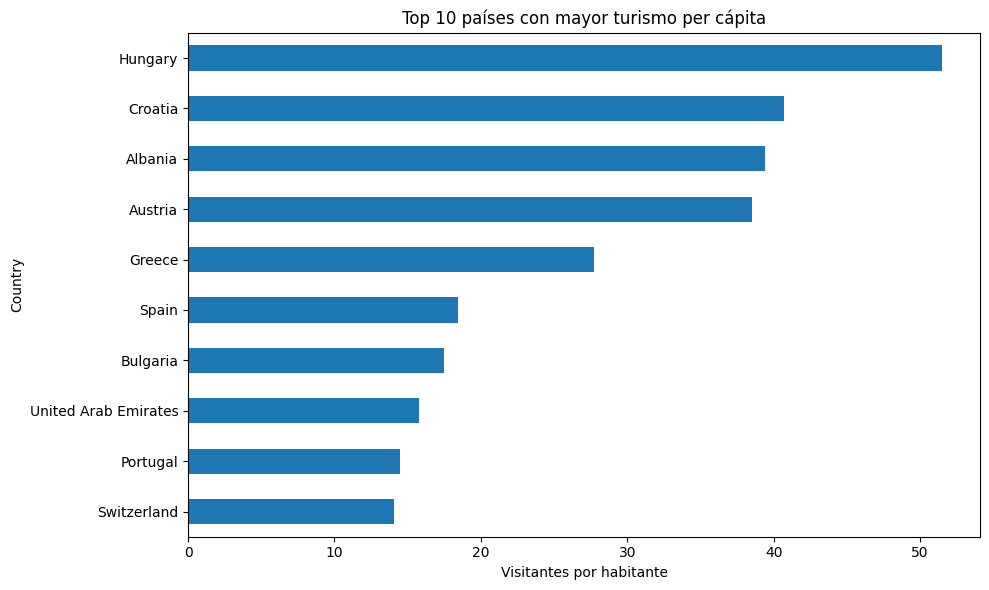

In [10]:
df_pc = (df_tourism.groupby("Country")
         .apply(lambda x: x["N_visitors"].sum() / x["Population"].max())
         .nlargest(10))

plt.figure(figsize=(10,6))
df_pc.sort_values().plot(kind="barh")
plt.title("Top 10 países con mayor turismo per cápita")
plt.xlabel("Visitantes por habitante")
plt.tight_layout()
plt.show()



Histograma

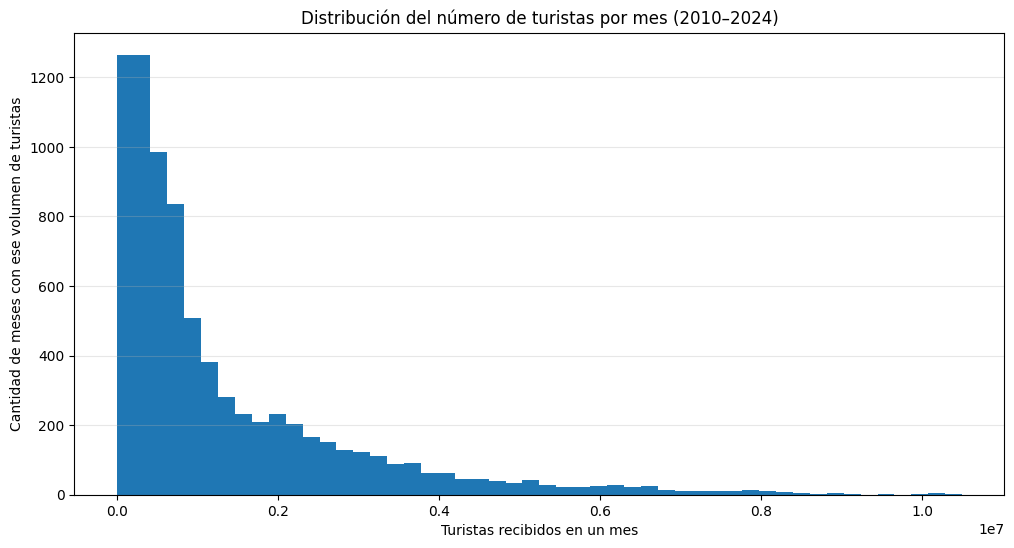

In [20]:


plt.figure(figsize=(12,6))

plt.hist(df_tourism['N_visitors'], bins=50)

# Títulos más claros
plt.title("Distribución del número de turistas por mes (2010–2024)")
plt.xlabel("Turistas recibidos en un mes")
plt.ylabel("Cantidad de meses con ese volumen de turistas")

# Líneas de cuadrícula para mejor lectura
plt.grid(axis='y', alpha=0.3)

plt.show()


A continuación se realiza un analisis del turismo medio a lo largo de año por pais, de esta forma podemos observar los meses mas y menos turísticos del país seleccionado.

Para este análisis se escluyen los meses del COVID para que no contaminen las gráficas:

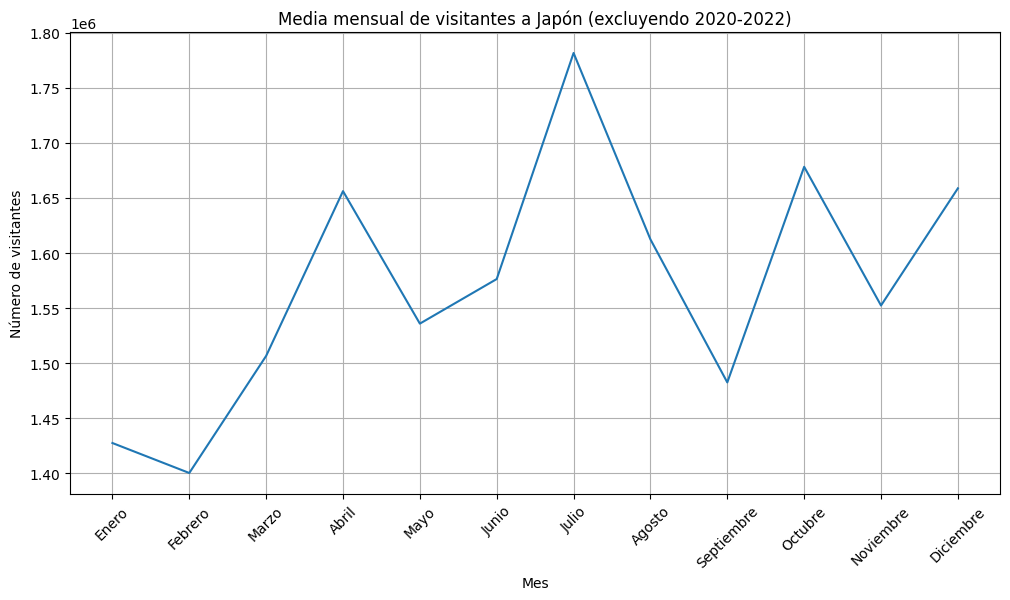

In [ ]:
# --------------------------
# Filtrar por País y excluir años 2020, 2021, 2022
# --------------------------
df_japan = df_tourism[
    (df_tourism['Country'] == 'Japan') &
    (~df_tourism['Year'].isin([2020, 2021, 2022]))
]

# --------------------------
# Calcular media de visitantes por mes
# --------------------------
df_monthly_avg = df_japan.groupby('Month', as_index=False)['N_visitors'].mean()

# Diccionario número de mes -> nombre
month_dict = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Reemplazar números por nombres
df_monthly_avg['Month_name'] = df_monthly_avg['Month'].map(month_dict)

# --------------------------
# Crear gráfico de línea suave
# --------------------------
plt.figure(figsize=(12,6))
sns.lineplot(data=df_monthly_avg, x='Month_name', y='N_visitors', marker=None)
plt.title('Media mensual de visitantes a Japón (excluyendo 2020-2022)')
plt.xlabel('Mes')
plt.ylabel('Número de visitantes')
plt.xticks(rotation=45)  # Rotar nombres de meses
plt.grid(True)
plt.show()

En este caso, para Japón se pueden observar picos de turismo en abril y julio, esto es debido a que este país recibe muchos turistas en Primavera debido a sus conocidos festivales de cerezos en flor y en Julio cuando la gente tiene vacaciones generalmente.

Los mejores meses para viajar serían entorno a enero y septiembre.


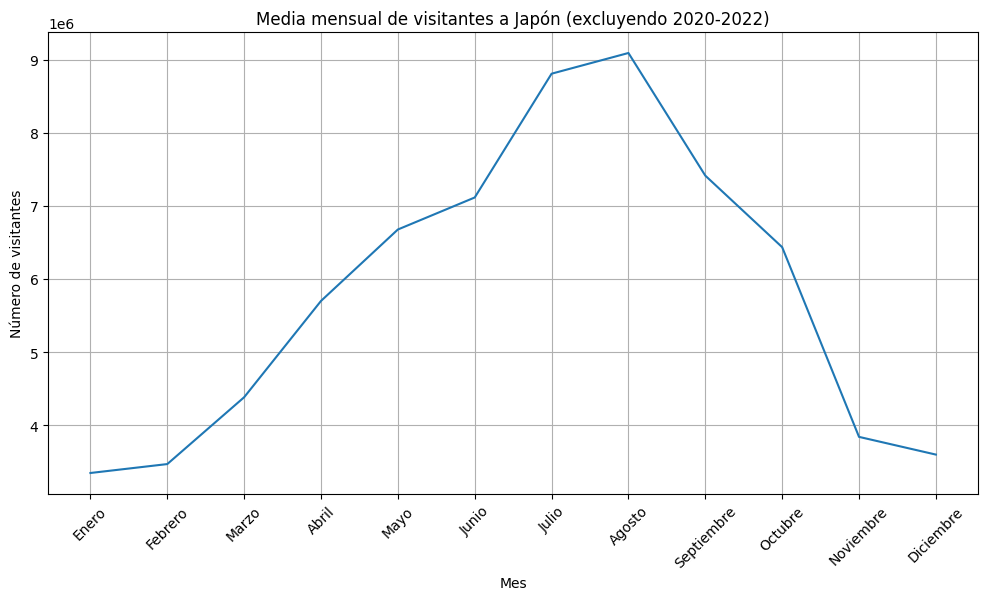

In [ ]:
# --------------------------
# Filtrar por País y excluir años 2020, 2021, 2022
# --------------------------
df_japan = df_tourism[
    (df_tourism['Country'] == 'Spain') &
    (~df_tourism['Year'].isin([2020, 2021, 2022]))
]

# --------------------------
# Calcular media de visitantes por mes
# --------------------------
df_monthly_avg = df_japan.groupby('Month', as_index=False)['N_visitors'].mean()

# Diccionario número de mes -> nombre
month_dict = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Reemplazar números por nombres
df_monthly_avg['Month_name'] = df_monthly_avg['Month'].map(month_dict)

# --------------------------
# Crear gráfico de línea suave
# --------------------------
plt.figure(figsize=(12,6))
sns.lineplot(data=df_monthly_avg, x='Month_name', y='N_visitors', marker=None)
plt.title('Media mensual de visitantes a España (excluyendo 2020-2022)')
plt.xlabel('Mes')
plt.ylabel('Número de visitantes')
plt.xticks(rotation=45)  # Rotar nombres de meses
plt.grid(True)
plt.show()

En España sin embargo el turismo se acentua entorno a los meses de verano debido al buen clima.